In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style("darkgrid")
from sklearn import linear_model
import random

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Levanto los datos
df = pd.read_csv('solver_project_op1__mediciones_tam_16.csv')

In [3]:
print("Decripción de los datos")
print(df.describe())

print("\nLas primeras 8 filas de los datos")
print(df.head(8))

Decripción de los datos
       Repeticion               c            asm
count  100.000000      100.000000     100.000000
mean    50.500000   482618.480000  235718.900000
std     29.011492    91908.583158   15953.710751
min      1.000000   381817.000000  221930.000000
25%     25.750000   419908.000000  222971.000000
50%     50.500000   439832.000000  240481.500000
75%     75.250000   573834.250000  241561.750000
max    100.000000  1036120.000000  359016.000000

Las primeras 8 filas de los datos
   Repeticion        c     asm
0           1   611740  245058
1           2   470792  240907
2           3  1036120  240761
3           4   465672  240504
4           5   469588  244031
5           6   471336  240445
6           7   463084  240467
7           8   462596  241472


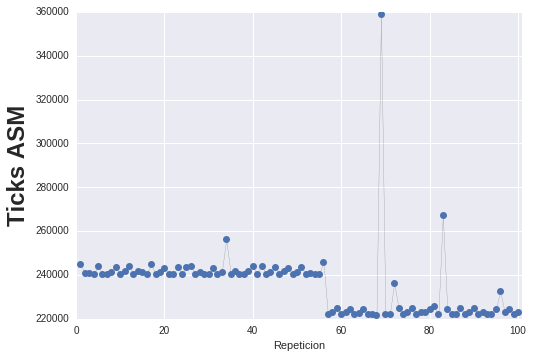

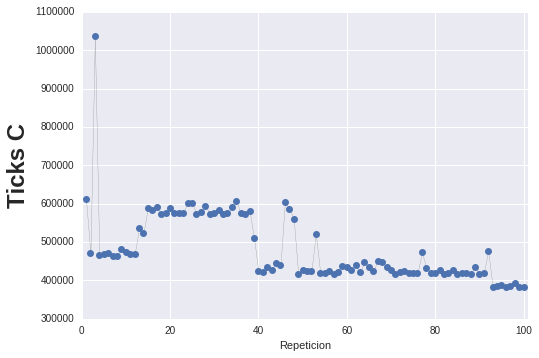

In [4]:
# Gráficos los datos

sns.tsplot(time=df['Repeticion'], data=df['asm'], interpolate=False)
sns.plt.ylabel(u'Ticks ASM', fontsize=24, fontweight='bold')
sns.plt.show()
sns.plt.ylabel(u'Ticks C', fontsize=24, fontweight='bold')
sns.tsplot(time=df['Repeticion'], data=df['c'], interpolate=False)
sns.plt.show()

Decripción de los datos podados c
count        70.000000
mean     451542.985714
std       46400.200940
min      392876.000000
25%      419900.000000
50%      431028.000000
75%      468691.000000
max      574112.000000
Name: c, dtype: float64


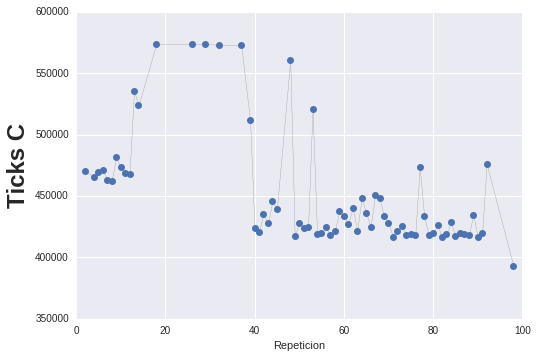

Decripción de los datos podados asm
count        97.000000
mean     233910.175258
std        9274.789956
min      221930.000000
25%      222926.000000
50%      240474.000000
75%      241479.000000
max      245848.000000
Name: asm, dtype: float64


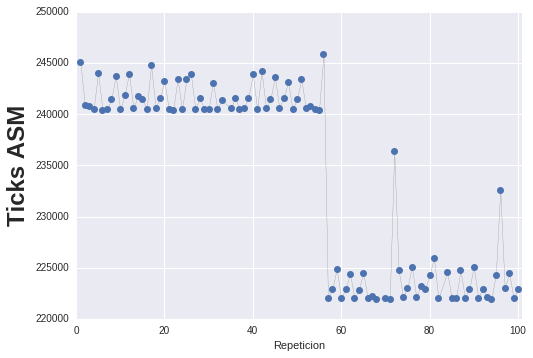

In [5]:
# Limpio los outliers

def mascara_outliers(s):
        return abs(s - s.mean()) <= s.std()

   # return abs(s - s.mean()) <= 2*s.std()
    
mascara_c = mascara_outliers(df['c'])
df_c = df[mascara_c]
mascara_asm = mascara_outliers(df['asm'])
df_asm = df[mascara_asm]
print("Decripción de los datos podados c")
print(df_c['c'].describe())            
sns.tsplot(time=df_c['Repeticion'], data=df_c['c'], interpolate=False)
sns.plt.ylabel(u'Ticks C', fontsize=24, fontweight='bold')
sns.plt.show()
print("Decripción de los datos podados asm")
print(df_asm['asm'].describe())        
sns.tsplot(time=df_asm['Repeticion'], data=df_asm['asm'], interpolate=False)
sns.plt.ylabel(u'Ticks ASM', fontsize=24, fontweight='bold')
sns.plt.show()